<a href="https://colab.research.google.com/github/ElatmaniOumaima/MachineLearning/blob/main/MachineLearningProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data explaination:
1. Âge : L'âge de l'individu au moment du diagnostic.



2. Race : L'origine raciale ou ethnique de l'individu.
3. État civil : Le statut matrimonial de l'individu, tel que marié, célibataire, divorcé ou veuf.
4. Stade T : Décris la taille et l'étendue de la tumeur primaire (T) dans le sein.
5. Stade N : Indique si le cancer s'est propagé aux ganglions lymphatiques voisins (N) de l'aisselle (aisselle).
6. Stade 6 : Référence au stade global du cancer du sein selon la 6ème édition du système de stadification du cancer de l'American Joint Committee on Cancer (AJCC).
7. Différenciation : Cela pourrait faire référence au grade de la tumeur, qui évalue dans quelle mesure les cellules cancéreuses ressemblent aux cellules normales sous un microscope.
8. Grade : Le grade de la tumeur indique à quel point les cellules cancéreuses sont anormales sous un microscope et à quelle vitesse la tumeur est susceptible de se développer et de se propager.
9. Stade A : Similaire au Stade T et au Stade N, le Stade A fait probablement référence à un autre aspect de la stadification du cancer, probablement lié à l'étendue de la maladie et au pronostic.
10. Taille de la tumeur : La taille de la tumeur primaire dans le sein, généralement mesurée en centimètres.
11. Statut des œstrogènes : Indique si les cellules cancéreuses ont des récepteurs pour l'hormone œstrogène.
12. Statut de la progestérone : Similaire au statut des œstrogènes, le statut des récepteurs de la progestérone indique si les cellules cancéreuses ont des récepteurs pour l'hormone progestérone.
13. Ganglion lymphatique régional examiné : Le nombre de ganglions lymphatiques régionaux examinés lors de la chirurgie pour déterminer la participation des ganglions lymphatiques.
14. Régional Nœud Positif : Indique si le cancer s'est propagé aux ganglions lymphatiques régionaux.
15. Mois de survie : Le nombre de mois survécus après le diagnostic.
16. 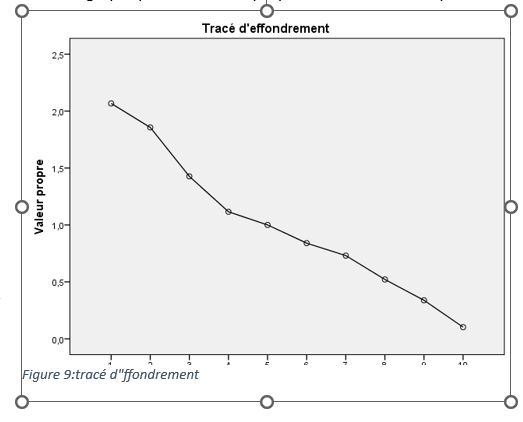Statut : Indique le statut actuel de l'individu, probablement s'il est en vie ou décédé au moment de la collecte ou de l'analyse des données.



#Data preprocessing

##Data cleaning

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder


In [ ]:
from google.colab import files
files.upload()

In [ ]:
df=pd.read_csv("Breast_Cancer.csv")

In [ ]:
df1=df.copy()

In [ ]:
df

In [ ]:
df.columns

In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
df.shape

### On affiche les modlités prenantes par les variables catégoriales

In [ ]:
df["Race"].unique()

In [ ]:
df["Marital Status"].unique()

In [ ]:
df['T Stage '].unique()

In [ ]:
df['N Stage'].unique()

In [ ]:
df['6th Stage'].unique()

In [ ]:
df["differentiate"].unique()

In [ ]:
df['Grade'].unique()

In [ ]:
df['A Stage'].unique()

In [ ]:
df['Estrogen Status'].unique()

In [ ]:
df['Progesterone Status'].unique()

In [ ]:
df['Status'].unique()

##Data transformation and data formatting:

In [ ]:
## on formatte notre categoriale variables
##on definit une fonction
label_encoder = LabelEncoder()

# Iterate over each categorical column and encode its values
def encodin(data,categorical_columns):
  for column in categorical_columns:
    data[column] = label_encoder.fit_transform(data[column])

In [ ]:
encodin(df,df.select_dtypes(include=['object']).columns.tolist())

In [ ]:
df

In [ ]:
df.corr()

In [ ]:
##we plot the scatter point for the survival months and status to see the data distributions
##we define a function  that when we call it we give it the parameter to plot in sccater plot
import matplotlib.pyplot as plt
def scatter_plot(x, y):
    plt.scatter(x, y)
    plt.xlabel(f'X{x.name}')
    plt.ylabel(f'Y-{y.name}')
    plt.title('Scatter Plot')
    plt.show()


def scatter_plots_over_columns(data, target_column):
    num_columns = len(data.columns) - 1  # Exclude the target column
    num_plots_per_row = 4
    num_rows = (num_columns + num_plots_per_row - 1) // num_plots_per_row

    fig, axes = plt.subplots(num_rows, num_plots_per_row, figsize=(15, 5*num_rows))
    plt.subplots_adjust(hspace=0.5)

    for i, column in enumerate(data.columns):
        if column == target_column:
            continue  # Skip the target column
        row = i // num_plots_per_row
        col = i % num_plots_per_row
        if row == num_rows - 1 and col >= num_columns % num_plots_per_row:
            # Skip if there are no more columns to plot in the last row
            continue
        axes[row, col].scatter(data[column], data[target_column])
        axes[row, col].set_xlabel(column)
        axes[row, col].set_ylabel(target_column)
        axes[row, col].set_title(f"{column} vs {target_column}")

    plt.tight_layout()
    plt.show()
scatter_plots_over_columns(df, 'Survival Months')

##Feature scalling for continous features

In [ ]:
from sklearn.preprocessing import StandardScaler

# Assuming 'df' is your DataFrame containing the breast cancer data
# Assuming 'continuous_columns' is a list of column names containing continuous variables

# Initialize the StandardScaler
scaler = StandardScaler()

def stand(df,col,scaler):
    # Reshape the column to a 2D array
    col_data = df[col].values.reshape(-1, 1)
    # Scale the column
    df[col] = scaler.fit_transform(col_data)




In [ ]:
L=df.select_dtypes(include=['int']).columns.tolist()
for col in L:
  stand(df,col,scaler)

In [ ]:
df.dtypes


In [ ]:
df.corr()

In [ ]:
int_columns = [col for col in df.columns if df[col].dtype == 'float64']
scatter_plots_over_columns(df[int_columns], 'Survival Months')

##data visualization and intrepretation:

In [ ]:
##ploting the  frequences of the stages
def plot_stage_frequencies(df, stage_column):
    # Count the frequencies of each stage
    stage_counts = df[stage_column].value_counts()

    # Plot the frequencies
    plt.figure(figsize=(15, 6))
    stage_counts.plot(kind='bar', color='skyblue')
    plt.title(f'Frequency of Stages {stage_column}')
    plt.xlabel('Stage')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.show()

In [ ]:
L=['A Stage','6th Stage','N Stage','T Stage ','differentiate','Grade','Estrogen Status','Progesterone Status']
for col in L:
  plot_stage_frequencies(df1, col)

In [ ]:
##now we plot the percentage of each columns values the pourcentage of alive people and dead people


def plot_stage_status_percentage(df, stage_column, status_column):
    # Calculate the percentage of alive and dead people for each stage category
    original_stage_names = label_encoder.classes_
    stage_status_percentage = df.groupby(stage_column)[status_column].value_counts(normalize=True) * 100


    # Plot the pie charts for each stage category
    for stage_category, percentages in stage_status_percentage.groupby(level=0):


        plt.figure(figsize=(6, 6))
        plt.pie(percentages, labels=percentages.index.get_level_values(1), autopct='%1.1f%%', colors=['skyblue', 'lightcoral'], startangle=140)
        plt.title(f'Percentage of Alive and Dead People for Stage {stage_category}')
        plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
        plt.show()

# Call the function with the DataFrame, stage column name, and status column name
plot_stage_status_percentage(df1, 'A Stage', 'Status')


In [ ]:
plot_stage_status_percentage(df1, 'differentiate', 'Status')

In [ ]:
plot_stage_status_percentage(df1, 'Grade', 'Status')

In [ ]:
plot_stage_status_percentage(df1, 'Estrogen Status', 'Status')

In [ ]:
plot_stage_status_percentage(df1, 'Progesterone Status', 'Status')

In [ ]:
plot_stage_status_percentage(df1,'6th Stage' , 'Status')

In [ ]:
plot_stage_status_percentage(df1,'N Stage' , 'Status')

In [ ]:
plot_stage_status_percentage(df1,'T Stage ' , 'Status')

In [ ]:
plot_stage_status_percentage(df1,'Marital Status' , 'Status')

In [ ]:
plot_stage_status_percentage(df1,'Race' , 'Status')

In [ ]:
df.corr()

##Etude ACP (Reduction de dimensions)



*   On a d’après la matrice de corrélaƟon plusieurs variables qui ne se sont pas supérieur à 0.5. Donc, on
peut dire que la factorisaƟon n’est pas conseillée selon la matrice de corrélaƟon.
*   Maintenant on verras le test de KMO et barllet :



In [ ]:
!pip install factor-analyzer

In [ ]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity, calculate_kmo

# Assuming 'df' is your DataFrame containing the breast cancer data

# Calculate Bartlett's test of sphericity
chi_square_value, p_value = calculate_bartlett_sphericity(df)
print("Bartlett's test of sphericity:")
print("Chi-Square Value:", chi_square_value)
print("P-value:", p_value)

# Calculate the Kaiser-Meyer-Olkin (KMO) measure of sampling adequacy
kmo_all, kmo_model = calculate_kmo(df)
print("\nKMO measure of sampling adequacy:")
print("Overall KMO:", kmo_model)


##On a l’indice de KMO >0.5 ainsi la SignificaƟon de BartleƩ p_value =0.000, c’est très significatif. Donc la
factorisation est conseillée. L’ACP satisfait à au moins deux de ces trois condiƟons (KMO et BartleƩ),
Donc on peut continuer.

##Combien de facteurs retenir ? :
Trois règles sont applicables :
• 1ere règle : la règle de Kaiser qui veut qu’on ne retienne que les facteurs aux valeurs propres supérieures à 1.
• 2eme règle : on choisit le nombre d’axe en fonction de la restitution minimale d’information que l’on souhaite. Pour ces deux premières règles, on examine le tableau « Variance totale expliquée ».
 	D’après la 1ere règle de Kaiser et d’après le tableau Variance totale expliquée et dans la colonne ‘cumulés’, on voit qu’on restitue 74,664% si on retient 5 facteurs
*	• 3eme règle : test du coude. On observe le graphique des valeurs propres et on ne retient que les valeurs qui se trouvent à gauche du point d’inflexion. Graphiquement, on part des composants qui apportent le moins d’information (qui se trouvent à droite), on relie par une droite les points presque alignés et on ne retient que les axes qui sont au-dessus de cette ligne.



In [ ]:
from sklearn.decomposition import PCA
import numpy as np

# Assuming 'df' is your DataFrame containing the breast cancer data

# Fit PCA
pca = PCA()
pca.fit(df)

# Get explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Compute cumulative explained variance ratio
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# Print explained variance ratio and cumulative explained variance ratio
print("Explained Variance Ratio:")
print(explained_variance_ratio)
print("\nCumulative Explained Variance Ratio:")
print(cumulative_variance_ratio)


In [ ]:
import numpy as np

# Assuming 'explained_variance_ratio' contains the explained variance ratio for each principal component

# Compute the second derivative of the explained variance ratio
second_derivative = np.gradient(np.gradient(explained_variance_ratio))

# Find the indices where the second derivative is closest to zero
reflection_point_indices = np.where(np.abs(second_derivative) < 1e-5)[0]

# Plot scree plot with reflection points
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='-')
plt.title('Scree Plot with Reflection Points')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)

# Plot reflection points
for index in reflection_point_indices:
    plt.plot(index + 1, explained_variance_ratio[index], marker='o', markersize=10, color='red', label='Reflection Points')

plt.legend()
plt.show()


In [ ]:
second_derivative = np.gradient(np.gradient(explained_variance_ratio))

# Calculer la dérivée seconde à partir du quatrième point
fourth_point_second_derivative = second_derivative[3]

print("La dérivée seconde à partir du quatrième point est:", fourth_point_second_derivative)

##Conclusion d'ACP : alors on auras 3 composantes principales

In [ ]:




# Créer une instance de PCA avec le nombre de composantes souhaité
pca = PCA(n_components=4)

# Fitter le modèle PCA et transformer les données
PCA_3= pca.fit_transform(df)

# Afficher la forme de la nouvelle représentation des données
print("La forme de la représentation transformée des données est :", PCA_3.shape)



In [ ]:
components_matrix = pca.components_
print("Matrice de composantes :")
pd.DataFrame(components_matrix)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

# Suppose 'data' is your dataset

# Create an instance of PCA with the desired number of components
pca = PCA(n_components=3)

# Fit the PCA model and transform the data
transformed_data = pca.fit_transform(df)

# Create a 3D scatter plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot the transformed data
ax.scatter(transformed_data[:, 0], transformed_data[:, 1], transformed_data[:, 2], c='b', marker='o')

# Set labels and title
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('Data After PCA')

# Show the plot
plt.show()
